# Required Liabraries

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.datasets import load_boston
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro
from scipy.stats import kstest
from scipy.stats import normaltest
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Data Gathering

In [6]:
data=load_boston()
df=pd.DataFrame(data["data"],columns=data["feature_names"])
df["Target"]=data["target"]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Exploratory Data Analysis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [8]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Target     0
dtype: int64

In [11]:
column_list=list(df.columns)

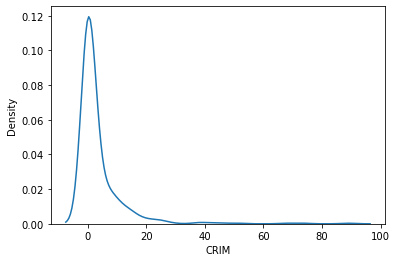

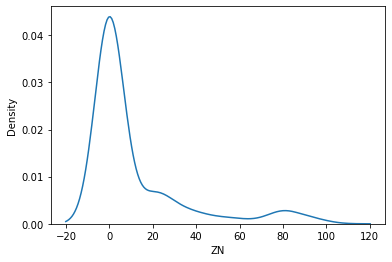

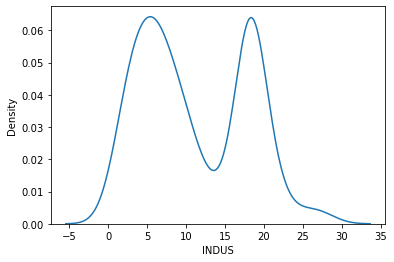

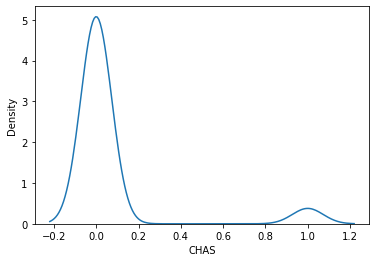

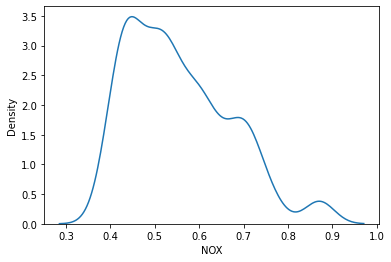

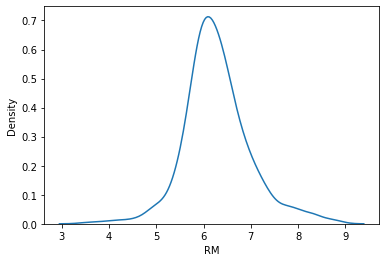

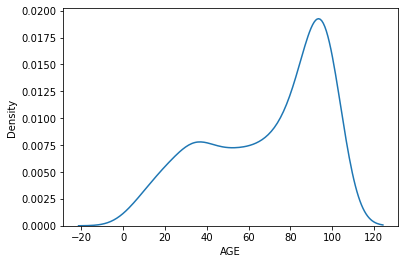

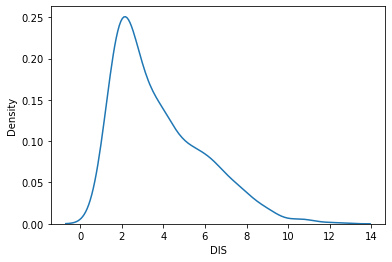

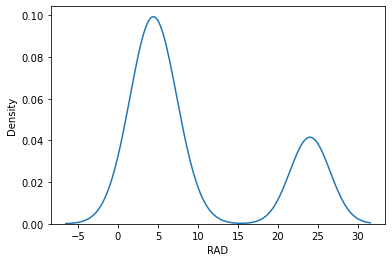

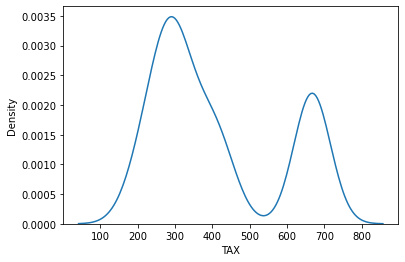

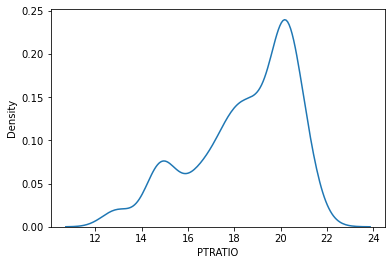

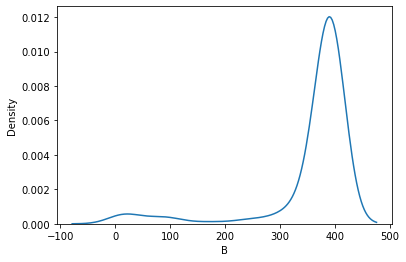

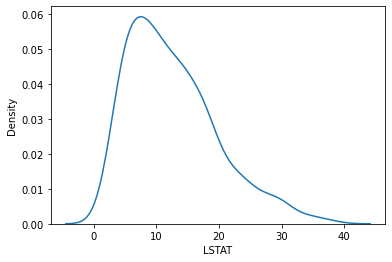

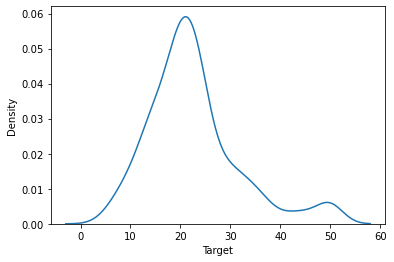

In [14]:
for i in column_list:
    sns.kdeplot(df[i])
    plt.show()

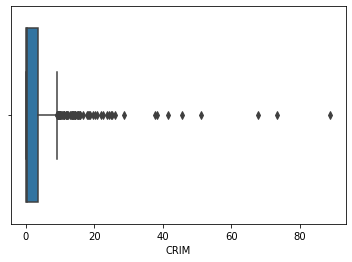

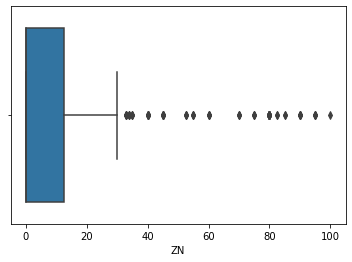

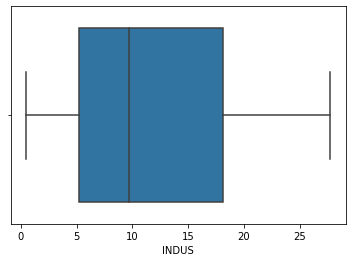

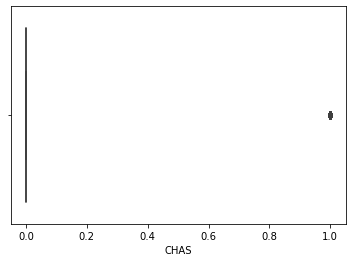

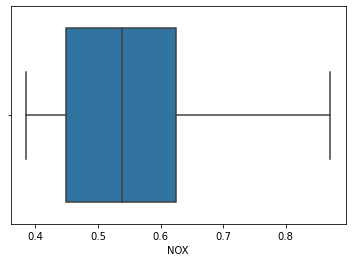

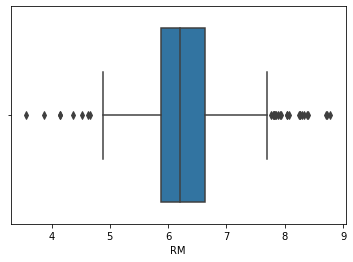

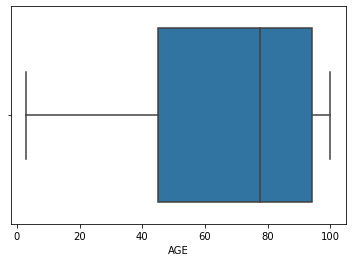

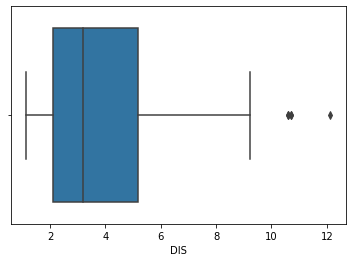

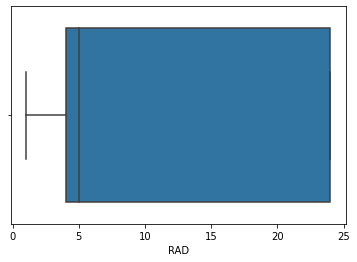

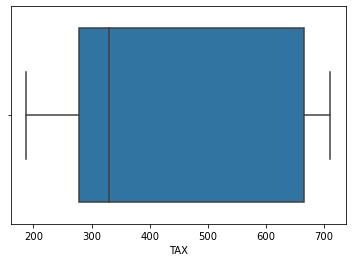

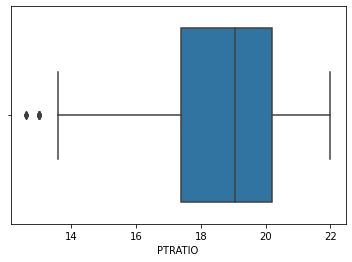

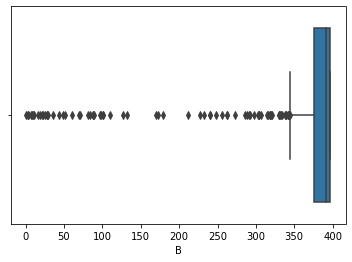

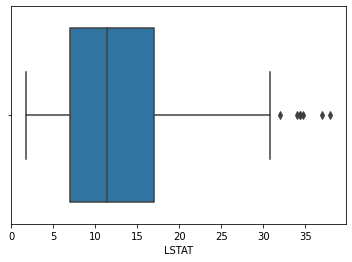

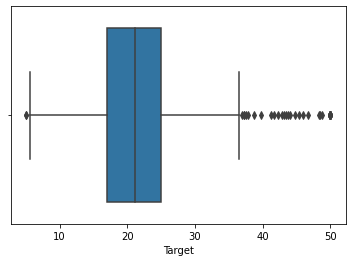

In [16]:
for i in column_list:
    sns.boxplot(df[i])
    plt.show()

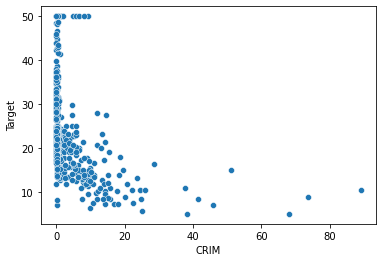

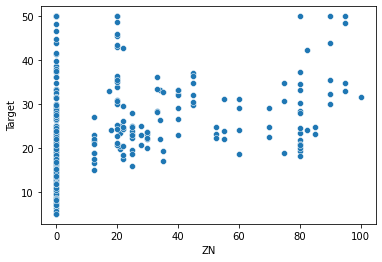

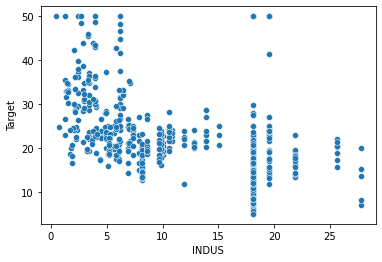

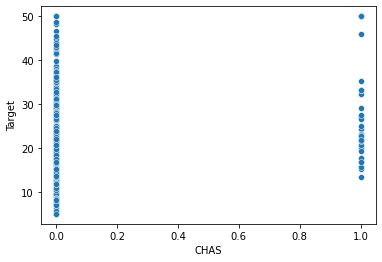

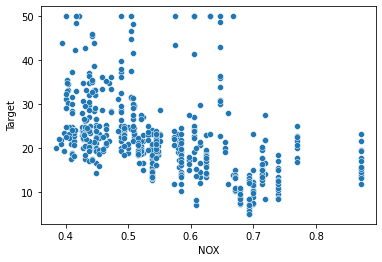

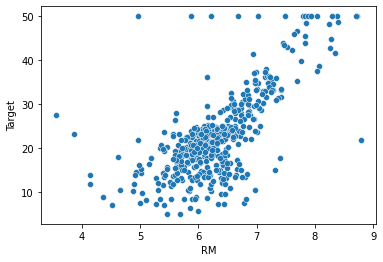

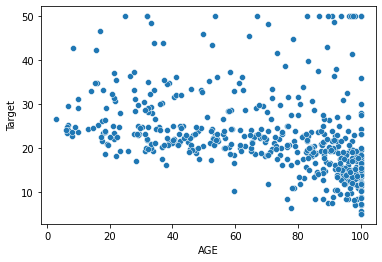

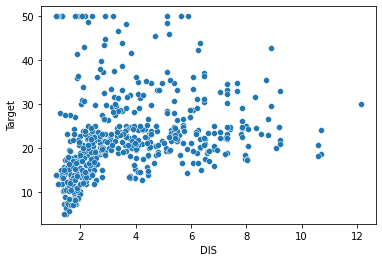

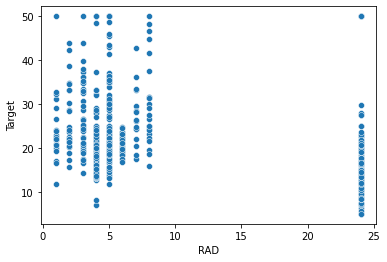

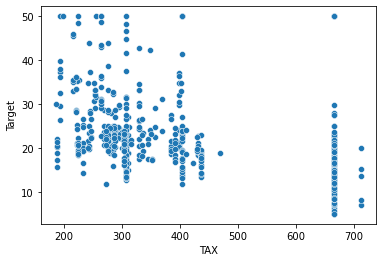

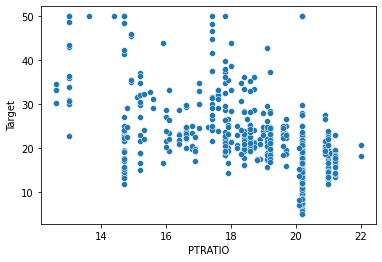

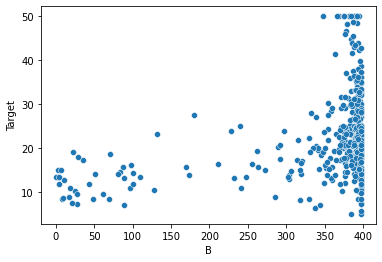

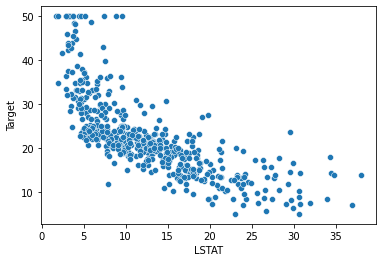

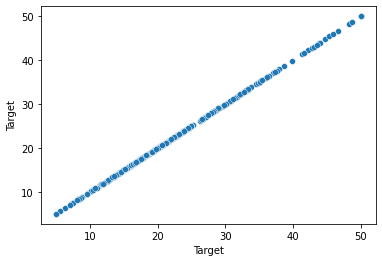

In [25]:
# Checking Linear relationship between dependent and independent variables
for i in column_list:
    sns.scatterplot(x=df[i],y=df["Target"])
    plt.show()

# Data Engineer

# Model training

In [17]:
# We first split values in independent and dependent feature
X=df.drop("Target",axis=1)
y=df["Target"]

In [18]:
# Train_test_split data
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.70)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((354, 13), (152, 13), (354,), (152,))

In [29]:
def evaluate(model,X_val,y_val):
    pred=model.predict(X_val)
    mse=mean_squared_error(y_val,pred)
    print(f"{mse=}")
    rmse=np.sqrt(mse)
    print(f"{rmse=}")
    mae=mean_absolute_error(y_val,pred)
    print(f"{mae=}")
    r2=r2_score(y_val,pred)
    print(f"{r2=}")
    return pred,mse,rmse,mae,r2

In [93]:
from sklearn.ensemble import RandomForestRegressor

In [95]:
ranf=RandomForestRegressor(random_state=53)
ranf.fit(X_train,y_train)

RandomForestRegressor(random_state=53)

In [97]:
pred,mse,rmse,mae,r2=evaluate(ranf,X_train,y_train)

mse=1.6907291581920916
rmse=1.3002804152151533
mae=0.8429322033898301
r2=0.9788731175845804


In [98]:
pred,mse,rmse,mae,r2=evaluate(ranf,X_test,y_test)

mse=12.583414940789453
rmse=3.547310945038432
mae=2.4766907894736825
r2=0.8666054359623873


In [101]:
params={"n_estimators":np.arange(5,150,5),"max_depth":np.arange(1,10),"max_features":np.arange(1,len(column_list)),"min_samples_split":np.arange(1,10),"min_samples_leaf":np.arange(1,10)}
params

{'n_estimators': array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
         70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125, 130,
        135, 140, 145]),
 'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 'min_samples_split': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}

In [102]:
rscv=RandomizedSearchCV(ranf,params,cv=5)
rscv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=53),
                   param_distributions={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
        70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125, 130,
       135, 140, 145])})

In [103]:
rscv.best_estimator_

RandomForestRegressor(max_depth=7, max_features=6, min_samples_leaf=4,
                      min_samples_split=9, n_estimators=50, random_state=53)

In [105]:
rscv.best_params_

{'n_estimators': 50,
 'min_samples_split': 9,
 'min_samples_leaf': 4,
 'max_features': 6,
 'max_depth': 7}

In [106]:
rscv.best_score_

0.8074642777446831

In [104]:
ranf_hyp=RandomForestRegressor(max_depth=7, max_features=6, min_samples_leaf=4,
                      min_samples_split=9, n_estimators=50, random_state=53)
ranf_hyp.fit(X_train,y_train)

RandomForestRegressor(max_depth=7, max_features=6, min_samples_leaf=4,
                      min_samples_split=9, n_estimators=50, random_state=53)

In [107]:
pred,mse,rmse,mae,r2=evaluate(ranf_hyp,X_train,y_train)

mse=6.796060880852687
rmse=2.6069255610493918
mae=1.681054952423162
r2=0.9150783090111615


In [108]:
pred,mse,rmse,mae,r2=evaluate(ranf_hyp,X_test,y_test)

mse=12.289473843793647
rmse=3.505634585035019
mae=2.5067949813359087
r2=0.8697214537263245


In [109]:
import pickle
import json

In [111]:
with open ("model.pickle","wb")as f:
    pickle.dump(ranf_hyp,f)

In [112]:
with open("feature_list.json","w")as f:
    json.dump(column_list,f)